# 1. Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn. svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## 2. Charger les données

In [2]:
data = pd.read_csv('Book1.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

## 3. Analyse de données

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## 4.Prétraitement des données

In [8]:
list_object = ['job',
               'marital',
               'education',
               'default',
               'housing',
               'loan',
               'contact',
               'month',
               'poutcome'
]

In [9]:
label_encoder = LabelEncoder()
for type in list_object:
    data[type] = label_encoder.fit_transform(data[type])

In [10]:
data['y'] = label_encoder.fit_transform(data['y'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [12]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
data.corr().y.sort_values(ascending =False)

y            1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

## 5. Diviser les données : Train et Test

In [14]:
X = data.iloc [:, :-1]
y = data.iloc[:, -1]

In [15]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=8, stratify=y)

In [17]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (27126, 16)
y_train: (27126,)
X_test: (18085, 16)
y_test: (18085,)


<Axes: >

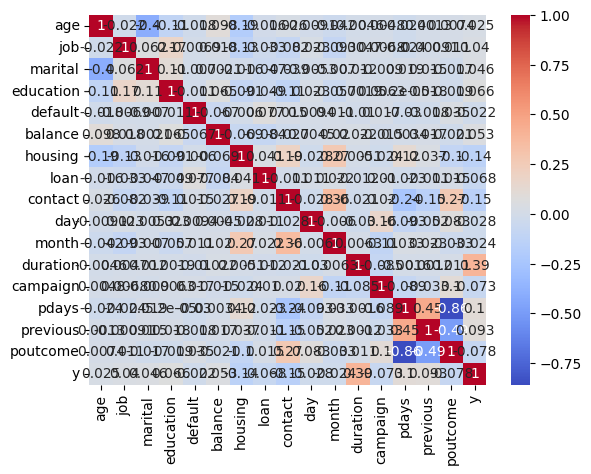

In [18]:
sns.heatmap(data.corr(), annot =True, cmap='coolwarm')

## 6. Selection au moins 4 Algorithms de Machine Learning

In [19]:
model_list = [RandomForestClassifier(),
              DecisionTreeClassifier(),
              SVC(),
              LogisticRegression()
              #KNeighborsClassifier(n_neighbors=5)
             ]

## 7. Evaluer les modèle

In [20]:
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model}\n")
    print("Precision_score =", precision_score(y_test, y_pred))
    print("Recall_score =", recall_score(y_test, y_pred))
    print("F1_score =", f1_score(y_test, y_pred))
    print(f"accuracy_score = {accuracy_score(y_test, y_pred)}\n")

RandomForestClassifier()

Precision_score = 0.6375515818431912
Recall_score = 0.43809073724007563
F1_score = 0.519327731092437
accuracy_score = 0.9051147359690351

DecisionTreeClassifier()

Precision_score = 0.45128676470588236
Recall_score = 0.46408317580340264
F1_score = 0.4575955265610438
accuracy_score = 0.8712745369090407

SVC()

Precision_score = 0.5454545454545454
Recall_score = 0.011342155009451797
F1_score = 0.022222222222222223
accuracy_score = 0.883218136577274

LogisticRegression()

Precision_score = 0.5423242467718795
Recall_score = 0.1786389413988658
F1_score = 0.26875222182723074
accuracy_score = 0.8862593309372409



In [21]:
model_random = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=7, verbose=1, n_jobs=2)
model_random.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.3s finished


RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=2, random_state=7,
                       verbose=1)

In [22]:
y_pred = model_random.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


In [23]:
print("Precision_score =", precision_score(y_test, y_pred))
print("Recall_score =", recall_score(y_test, y_pred))
print("F1_score =", f1_score(y_test, y_pred))
print(f"accuracy_score = {accuracy_score(y_test, y_pred)}\n")

Precision_score = 0.6429539295392954
Recall_score = 0.44848771266540643
F1_score = 0.5283964365256125
accuracy_score = 0.9063312137130218



In [24]:
y_pred1 = model_random.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


Text(0.5, 1.0, 'Matrice de confusion ')

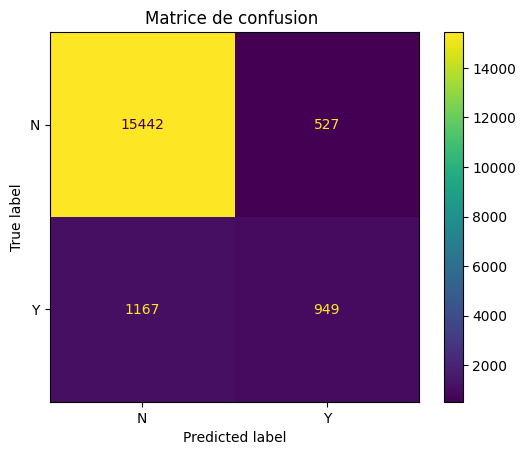

In [25]:
ConfusionMatrixDisplay.from_estimator(model_random, X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished


Text(0.5, 1.0, 'Matrice de confusion ')

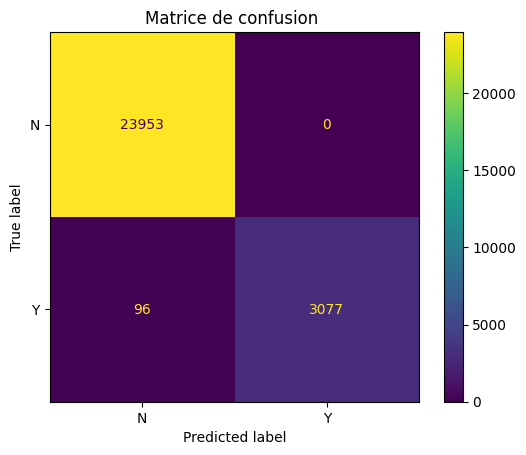

In [26]:
ConfusionMatrixDisplay.from_estimator(model_random, X_train, y_train, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

 # 8.Faire une simple prédiction

In [27]:
subset = data[['duration','y']]

In [28]:
X = data.iloc [:, :-1]
y = data.iloc[:, -1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=8, stratify=y)

In [30]:
model_random = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=7, verbose=1, n_jobs=2)

In [31]:
model_random.fit(X_train, y_train)
y_pred2 = model_random.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


In [32]:
print("Precision_score =", precision_score(y_test, y_pred2))
print("Recall_score =", recall_score(y_test, y_pred2))
print("F1_score =", f1_score(y_test, y_pred2))
print(f"accuracy_score = {accuracy_score(y_test, y_pred2)}\n")

Precision_score = 0.615007012622721
Recall_score = 0.41446124763705106
F1_score = 0.49520045172219085
accuracy_score = 0.901133536079624



In [33]:
example_index = np.random.randint(0, len(X_test))
example_data = X_test.iloc[example_index].values.reshape(1, -1)

In [34]:
predicted_class = model_random.predict(example_data)
predicted_class_label = label_encoder.inverse_transform(predicted_class)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


In [35]:
actual_class_label = label_encoder.inverse_transform([y_test.iloc[example_index]])

print(f'Example data: {example_data}')
print(f'Predicted class: {predicted_class_label}')
print(f'Actual class: {actual_class_label}')

Example data: [[ 39   4   1   3   0 548   1   0   0  19   9 154   2  -1   0   3]]
Predicted class: ['no']
Actual class: ['no']
